In [3]:
import tarfile
import numpy as np
import os
import gzip
import pickle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
def unpickle(file): # ref: https://www.cs.toronto.edu/~kriz/cifar.html
  train_data = []
  train_label = []
  test_data = []
  test_label = []
  with tarfile.open(file, 'r:gz') as t:
    t.extractall('./data')
    is_test_file = False

    for member in t.getnames():
      if ('test_batch' in member):
        is_test_file = True
        
      filename = os.path.join('.','data', member)
      try: 
        with open(filename, 'rb') as fo:
          batch = pickle.load(fo, encoding='latin1')
          data_file, labels_file = batch['data'], batch['labels']
          if (is_test_file == False):
            train_data.append(data_file)
            train_label.append(labels_file)
          else : 
            test_data.append(data_file)
            test_label.append(labels_file)
            is_test_file = False
      except:
        print("Error not data files")
  return np.concatenate(train_data), np.concatenate(test_data), np.concatenate(train_label), np.concatenate(test_label)
    

train_data_raw, test_data_raw, train_label_raw, test_label_raw = unpickle('cifar-10-python.tar.gz')

 


Error not data files
Error not data files
Error not data files


In [5]:
# normalize [0, 255] --> [0, 1] 

def greyscale_img(img_data):
  img_data_split = np.array(np.split(img_data, 3, axis=1))
  normalize_arr = (np.mean(img_data_split, axis=0, keepdims=True) / 255).reshape(img_data_split.shape[1], img_data_split.shape[2])
  return np.array(normalize_arr)


def onehot_encoding(labels, num_of_classifier = 9):
  labels_onehot = np.zeros((labels.shape[0], num_of_classifier + 1))
  # for i in range(labels.shape[0]):
  #   labels_onehot[i, labels[i]] = 1
  # optimize version
  labels_onehot[np.arange(labels.shape[0]), labels] = 1
  return labels_onehot

(50000, 1024)

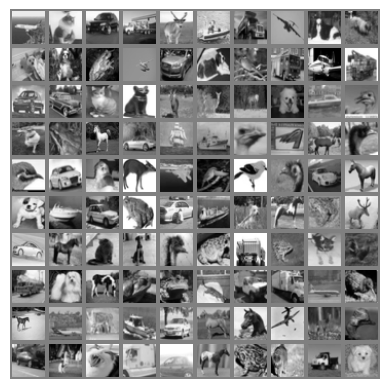

In [6]:
# Bạn có thể chạy cell này nhiều lần để xem các ảnh ngẫu nhiên khác nhau
n_rimages = 10; n_cimages = 10
padding = 2
canvas = 0.5 * np.ones((n_rimages * (32 + 2 * padding), n_cimages * (32 + 2 * padding)))
rand_idxs = np.random.permutation(np.arange(len(train_data_normalized))[:n_rimages * n_cimages])
for r in range(n_rimages):
    for c in range(n_cimages):
        i = r * n_cimages + c
        image =train_data_normalized[rand_idxs[i]].reshape(32, 32)
        temp1 = r * (32 + 2 * padding) + padding
        temp2 = c * (32 + 2 * padding) + padding
        canvas[temp1:temp1 + 32, temp2:temp2 + 32] = image
plt.imshow(canvas, cmap='gray', vmin=0, vmax=1)
plt.grid(None); plt.axis('off');


In [ ]:
train_X_pre_val = greyscale_img(train_data_raw)
test_X_pre_val = greyscale_img(test_data_raw)
train_Y_pre_val = onehot_encoding(train_label_raw)
test_Y_pre_val= onehot_encoding(test_label_raw)

(50000, 1024)


In [31]:
train_X, val_X, train_Y, val_Y = train_test_split(train_X_pre_val, train_Y_pre_val, test_size=0.25, random_state=1) 

In [33]:
print(train_X.shape)
print(val_X.shape)
print(train_Y.shape)
print(val_Y.shape)

(37500, 1024)
(12500, 1024)
(37500, 10)
(12500, 10)
